<a href="https://colab.research.google.com/github/gharashim/RL/blob/main/8_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install gym[classic_controll]

In [ ]:
# open ai gym --> cartpole

import gym

env = gym.make('CartPole-v0', render_mode = 'human')


/usr/local/lib/python3.11/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
state = env.reset() # 상태 초기화
print('상태: ', state)

action_space = env.action_space
print('액션 개수: ', action_space)

상태:  [-0.04012647 -0.02479145 -0.01285179 -0.02296694]
액션 개수:  Discrete(2)


In [ ]:
action = env.action_space.sample()
next_state, reward, done, info = env.step(action)

print("Next State:", next_state)
print("Reward:", reward)
print("Done:", done)
print("Info:", info)

Next State: [-0.01571983  0.0411614   0.04923417  0.03165206]
Reward: 1.0
Done: False
Info: {}


# 랜덤 에이전트

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

env = gym.make('CartPole-v1', render_mode='rgb_array')
state, _ = env.reset()

frames = []

done = False
while not done: # 에피소드가 끝날 때까지 반복
    # 랜덤 액션 선택
    # action = env.action_space.sample()
    action = np.random.choice([0, 1]) # 행동 선택(무작위)
    state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated # 둘 중 하나만 True면 에피소드 종료

    # 이미지 프레임 수집
    frame = env.render()
    frames.append(frame)

env.close()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure()
im = plt.imshow(frames[0])

def animate(i):
    im.set_array(frames[i])
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30, blit=True)
plt.close()  # 기존 matplotlib 창 안 띄우게

HTML(ani.to_jshtml())


# 경험 재생 메커니즘
- 에이전트가 경험한 데이터를 버퍼에 저장
- Q 함수 갱신할 때 이 버퍼로투버 경험 데이터를 무작위로 꺼내서 사용
- 경험 데이터 사이의 상관관계를 약화 > 편향이 적은 데이터로 학습

In [ ]:
# 경험 재생 메커니즘 구현
from collections import deque
import random
import numpy as np

class ReplayBuffer:
    def __init__(self, buffer_size, batch_size):
        self.buffer = deque(maxlen = buffer_size)
        self.batch_size = batch_size


    def add(self, state, action, reward, next_state, done):
        data = (state, action, reward, next_state, done)
        self.buffer.append(data)


    def __len__(self):
        return len(self.buffer)


    def get_batch(self):
        data = random.sample(self.buffer, self.batch_size)

        state      = np.stack([x[0] for x in data])
        action     = np.array([x[1] for x in data])
        reward     = np.array([x[2] for x in data])
        next_state = np.stack([x[3] for x in data])
        done       = np.array([x[4] for x in data]).astype(np.int32)
        return state, action, reward, next_state, done

In [ ]:
import gymnasium as gym

env = gym.make('CartPole-v1', render_mode='rgb_array')
replay_buffer = ReplayBuffer(buffer_size = 10000, batch_size = 32)

for epsiode in range(10): # 에피소드 10회 수행
    state = env.reset()[0]
    done = False

    while not done:
        action = 0 # 항상 0번째 행동만 수행

        # 경험 데이터 획득
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated

        replay_buffer.add(state, action, reward, next_state, done) # 버퍼에 추가
        state = next_state

        if len(replay_buffer.buffer) >= replay_buffer.batch_size:
            state_batch, action_batch, reward_batch, next_state_batch, done_batch = replay_buffer.get_batch()

            print(state_batch.shape)
            print(action_batch.shape)
            print(reward_batch.shape)
            print(next_state_batch.shape)
            print(done_batch.shape)

(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)
(32,)
(32, 4)
(32,)
(32, 4)
(32,)


In [ ]:
env.step(action)

(array([-0.45917243, -3.0880456 ,  0.70440274,  5.2775884 ], dtype=float32),
 0.0,
 True,
 False,
 {})

In [ ]:
# 목표 신경망 구현

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import copy

# Q-network 정의
class QNet(nn.Module):
    def __init__(self, action_size):
        super(QNet, self).__init__()
        self.fc1 = nn.Linear(4, 128)  # CartPole 관측공간: 4차원
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)



class DQNAgent:
    def __init__(self, state_size=4, action_size=2, device='cpu'):
        self.gamma = 0.98
        self.lr = 0.0005
        self.epsilon = 0.1
        self.buffer_size = 10000
        self.batch_size = 32
        self.state_size = state_size
        self.action_size = action_size
        self.device = device

        self.replay_buffer = ReplayBuffer(self.buffer_size, self.batch_size)
        self.qnet = QNet(action_size).to(self.device)
        self.qnet_target = copy.deepcopy(self.qnet)

        self.optimizer = torch.optim.Adam(self.qnet.parameters(), lr=self.lr)

    def sync_qnet(self):
        self.qnet_target.load_state_dict(self.qnet.state_dict())

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            state_tensor = torch.tensor(state, dtype=torch.float32).to(self.device).unsqueeze(0)
            with torch.no_grad():
                q_values = self.qnet(state_tensor)
            return torch.argmax(q_values).item()

    def update(self, state, action, reward, next_state, done):
        # 경험 재싱 버퍼에 경험 데이터 추가
        self.replay_buffer.add(state, action, reward, next_state, done)
        if len(self.replay_buffer) < self.batch_size:
            return

        # 미니배치 샘플링
        states, actions, rewards, next_states, dones = self.replay_buffer.get_batch()

        # 텐서로 변환
        states      = torch.tensor(states, dtype=torch.float32).to(self.device)
        actions     = torch.tensor(actions, dtype=torch.int64).to(self.device)
        rewards     = torch.tensor(rewards, dtype=torch.float32).to(self.device)
        next_states = torch.tensor(next_states, dtype=torch.float32).to(self.device)
        dones       = torch.tensor(dones, dtype=torch.float32).to(self.device)

        # 현재 Q값 예측
        qs = self.qnet(states)                            # (B, action_size)
        q  = qs.gather(1, actions.unsqueeze(1)).squeeze() # (B,)

        # 다음 상태에서의 최대 Q값 (target network)
        with torch.no_grad():
            next_qs = self.qnet_target(next_states)
            next_q = next_qs.max(1)[0]  # max Q over actions
            target = rewards + (1 - dones) * self.gamma * next_q  # Bellman target

        # 손실 계산
        loss = F.mse_loss(q, target)

        # 역전파 및 최적화
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()  # 선택적으로 loss를 반환


In [ ]:
# DQN 실행
episodes = 300
sync_interval = 20

env = gym.make('CartPole-v1', render_mode='rgb_array')

agent = DQNAgent(device='cuda' if torch.cuda.is_available() else 'cpu')
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done  = False
    total_reward = 0

    while not done:
        action = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        agent.update(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    if episode % sync_interval == 0:
        agent.sync_qnet()

    reward_history.append(total_reward)

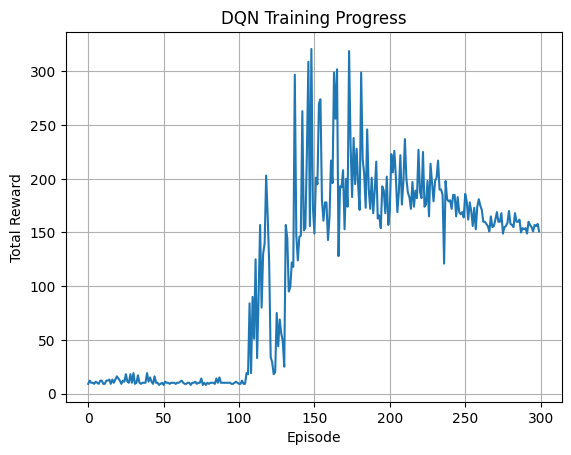

In [ ]:
import matplotlib.pyplot as plt

plt.plot(reward_history)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Training Progress")
plt.grid(True)
plt.show()
